# Cleaning Product Data

This notebook cleans the product data and exports the cleaned data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

In [2]:
# creating column names
col_names = [
    'territory',
    'ar_div',
    'customer_num',
    'sold_to_name',
    'item_num',
    'item_description',
    'item_type',
    'unit_of_measure',
    'weight',
    'standard_price',
    'quantity',
    'price',
    'year',
    'month'
]

In [3]:
df_2017 = pd.read_csv('../data/raw_data/imw131ECustom2017_200.zip', compression='zip', names=col_names)
df_2018 = pd.read_csv('../data/raw_data/imw131ECustom2018_200.zip', compression='zip', names=col_names)
df_2019 = pd.read_csv('../data/raw_data/imw131ECustom2019_200.zip', compression='zip', names=col_names)
df_2020 = pd.read_csv('../data/raw_data/imw131ECustom2020_200.zip', compression='zip', names=col_names)
df_2021 = pd.read_csv('../data/raw_data/imw131ECustom2021_200.zip', compression='zip', names=col_names)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


convert to datetime function

In [4]:
def convert_date(df):

    df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str)

    df['date'] = pd.to_datetime(df['date'])
    df.set_index(df['date'], inplace=True)
    df.sort_index(inplace=True)

    df.index = df.index.to_period('M')

    return df

combine dataframes

In [5]:
df_master = pd.concat([
    df_2017,
    df_2018,
    df_2019,
    df_2020,
    df_2021
])

df_master

,territory,ar_div,customer_num,sold_to_name,item_num,item_description,item_type,unit_of_measure,weight,standard_price,quantity,price,year,month
0,EB,0,1000026,Monterey Foods Market,039675777771,Have'a Corn Chips,CHIPS,EACH,4 oz,1.90,48.00,76.80,2017,1
1,EB,0,1000026,Monterey Foods Market,039675777771,Have'a Corn Chips,CHIPS,EACH,4 oz,1.90,96.00,168.00,2017,2
2,EB,0,1000026,Monterey Foods Market,039675777771,Have'a Corn Chips,CHIPS,EACH,4 oz,1.90,72.00,126.00,2017,3
3,EB,0,1000026,Monterey Foods Market,039675777771,Have'a Corn Chips,CHIPS,EACH,4 oz,1.90,96.00,168.00,2017,4
4,EB,0,1000026,Monterey Foods Market,039675777771,Have'a Corn Chips,CHIPS,EACH,4 oz,1.90,144.00,252.00,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74112,TR,0,9999,Dale Cox-Employee Purchases,857220006714,Big & Bold Sea Salt Popcorn,SNACK,EACH,6 oz,2.68,1.0,1.82,2021,2
74113,TR,0,9999,Dale Cox-Employee Purchases,858641003009,Daily Crave Veggie Chips-6 oz,CHIPS,EACH,6 oz,3.57,1.0,3.12,2021,4
74114,TR,0,9999,Dale Cox-Employee Purchases,858641003672,Daily Crave BBQ Veg Chips,CHIPS,EACH,5.5 oz,3.57,1.0,3.12,2021,4
74115,TR,0,9999,Dale Cox-Employee Purchases,858641003818,Daily Crave Lentil Smkd Gouda,CHIPS,EACH,4.25 oz,3.57,1.0,3.12,2021,1


In [6]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352733 entries, 0 to 74116
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   territory         352733 non-null  object 
 1   ar_div            352733 non-null  int64  
 2   customer_num      352733 non-null  int64  
 3   sold_to_name      352733 non-null  object 
 4   item_num          352733 non-null  object 
 5   item_description  352733 non-null  object 
 6   item_type         352166 non-null  object 
 7   unit_of_measure   352733 non-null  object 
 8   weight            352730 non-null  object 
 9   standard_price    352733 non-null  float64
 10  quantity          352733 non-null  object 
 11  price             352733 non-null  object 
 12  year              352733 non-null  int64  
 13  month             352733 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 40.4+ MB


<AxesSubplot:>

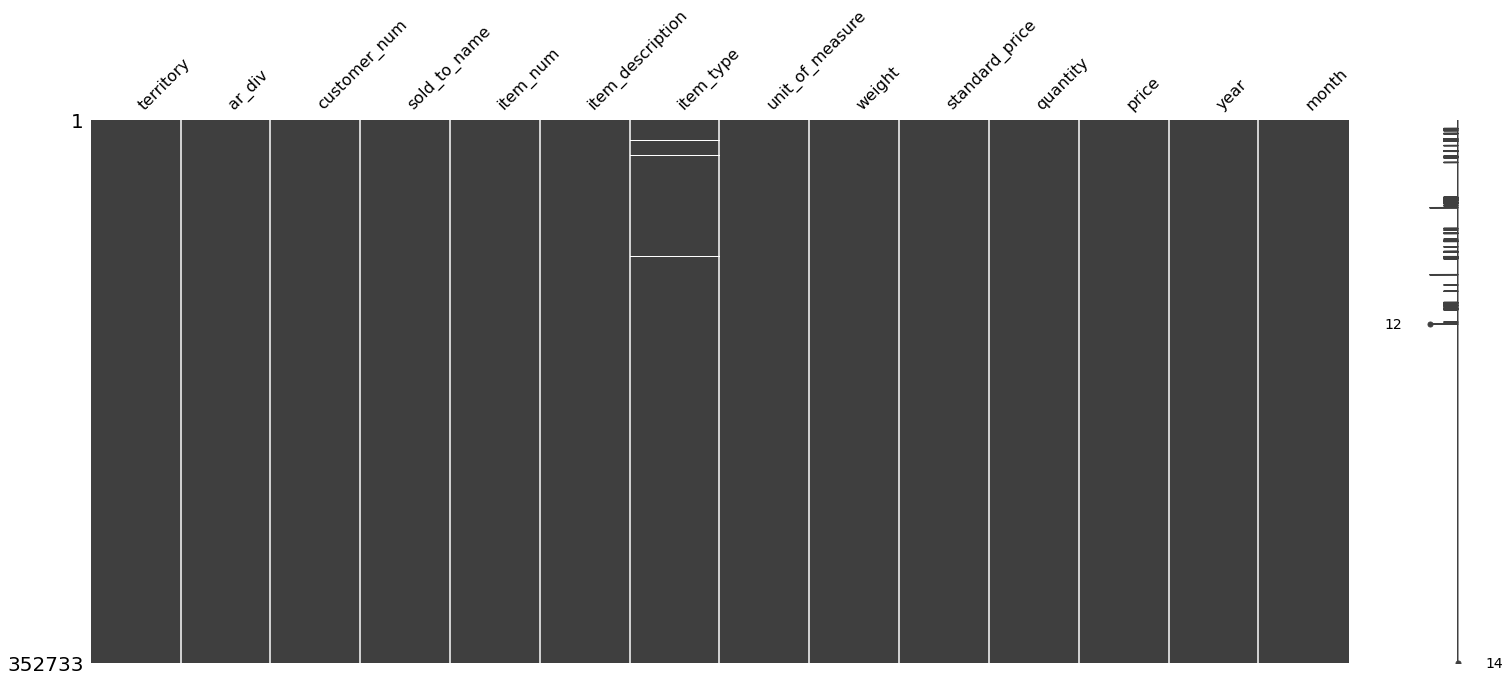

In [7]:
mn.matrix(df_master)

# Fix La Morenita

While exploring the data in tableau, a gap in La Morenita sales was noticed.

La Morenita changed some of the names of products. Items were marked as "discontinued" in the database and had to be unmarked and merged with full data. Names and item_num will be changed to make them the same across all years.

In [8]:
morenita_2020 = pd.read_csv('../data/raw_data/imw131E_La Morenita2020.zip', compression='zip', names=col_names)
morenita_2021 = pd.read_csv('../data/raw_data/imw131E_La Morenita2021.zip', compression='zip', names=col_names)

morenita = pd.concat([morenita_2020, morenita_2021])

In [10]:
morenita['item_description'].value_counts()

zzzzLa Morenita Tortilla Chips    997
zzzzLa Morenita Salt & Limon      942
zzzzLa Morenita Tostaditas        389
Name: item_description, dtype: int64

In [11]:
morenita['item_description'] = morenita['item_description'].str.replace('zzzz', '').str.strip()

In [12]:
morenita.tail()

,territory,ar_div,customer_num,sold_to_name,item_num,item_description,item_type,unit_of_measure,weight,standard_price,quantity,price,year,month
323,SN,0,1005208,Broadway Mkt.,696610110880,La Morenita Tortilla Chips,CHIPS,EACH,16 oz,3.69,59.0,217.71,2021,1
324,SN,0,1005208,Broadway Mkt.,696610110880,La Morenita Tortilla Chips,CHIPS,EACH,16 oz,3.69,60.0,221.40,2021,2
325,SN,0,1005208,Broadway Mkt.,696610111290,La Morenita Salt & Limon,CHIPS,EACH,16 oz,3.69,12.0,44.28,2021,1
326,SN,0,1005208,Broadway Mkt.,696610111290,La Morenita Salt & Limon,CHIPS,EACH,16 oz,3.69,30.0,110.70,2021,2
327,SN,0,1005208,Broadway Mkt.,696610110996,La Morenita Tostaditas,CHIPS,EACH,16 oz,3.69,11.0,40.59,2021,1


In [13]:
df_master[df_master['item_description'].str.contains('La Morenita Original')].head(1)

,territory,ar_div,customer_num,sold_to_name,item_num,item_description,item_type,unit_of_measure,weight,standard_price,quantity,price,year,month
1827,EB,0,1000438,Farmer Joe's - Fruitvale Ave.,850022349010,La Morenita Original,CHIPS,EACH,14 oz,3.59,144.00,516.96,2021,2


In [14]:
df_master[df_master['item_description'].str.contains('La Morenita Salt & Lime')].head(1)

,territory,ar_div,customer_num,sold_to_name,item_num,item_description,item_type,unit_of_measure,weight,standard_price,quantity,price,year,month
1838,EB,0,1000438,Farmer Joe's - Fruitvale Ave.,850022349027,La Morenita Salt & Lime,CHIPS,EACH,14 oz,3.59,120.00,430.80,2021,2


In [15]:
df_master[df_master['item_description'].str.contains('La Morenita Tostaditas')].head(1)

,territory,ar_div,customer_num,sold_to_name,item_num,item_description,item_type,unit_of_measure,weight,standard_price,quantity,price,year,month
1684,EB,0,1000438,Farmer Joe's - Fruitvale Ave.,696610110996,La Morenita Tostaditas,CHIPS,EACH,16 oz,3.2,36.00,106.20,2017,4


In [16]:
df_master[df_master['item_description'].str.contains('Morenita')]['item_description'].value_counts()

La Morenita Tortilla Chips    2425
La Morenita Salt & Limon      2329
La Morenita Tostaditas        1439
La Morenita Original           897
La Morenita Salt & Lime        844
Name: item_description, dtype: int64

In [17]:
df_master = pd.concat([df_master, morenita])

<AxesSubplot:>

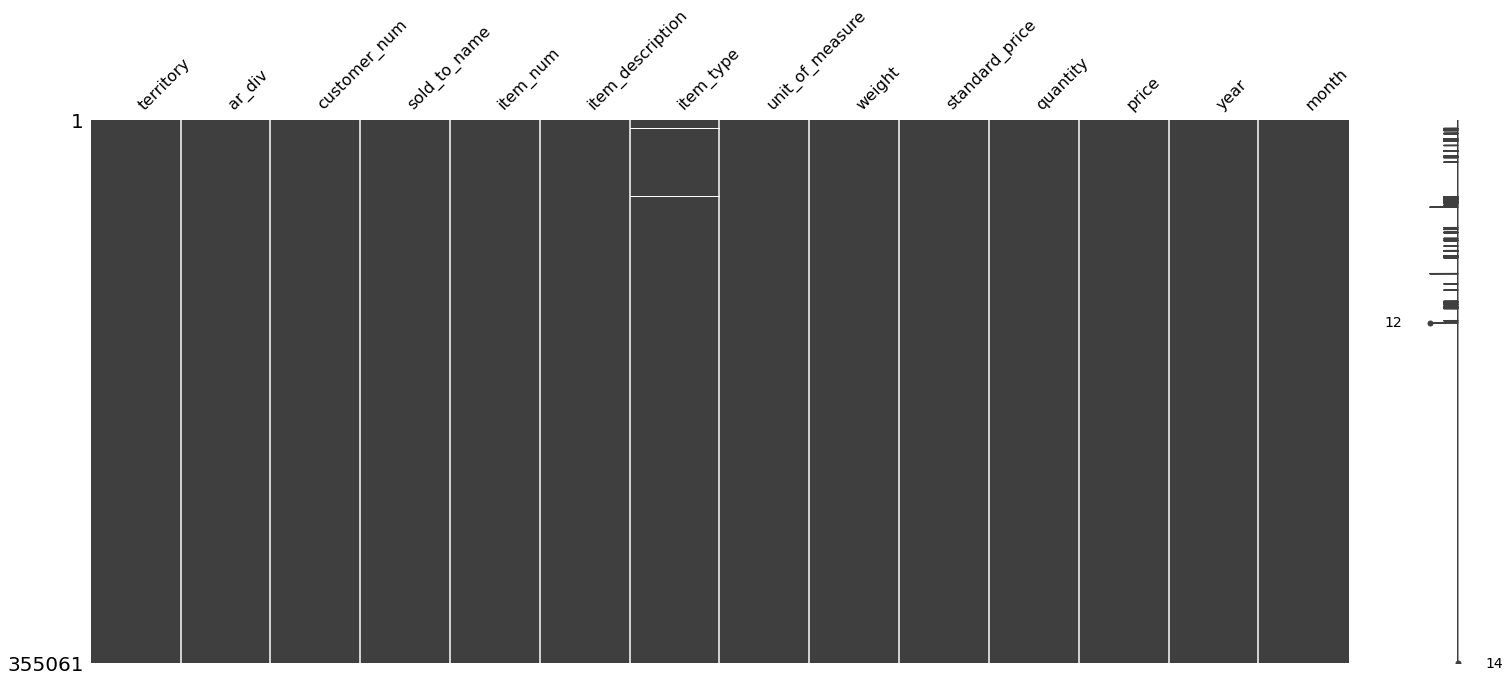

In [18]:
mn.matrix(df_master)

In [19]:
# converting item_num and quantity to str because the columns have mixed values
df_master['item_num'] = df_master['item_num'].astype(str)
df_master['quantity'] = df_master['quantity'].astype(str)

In [20]:
df_master['item_description'] = df_master['item_description'].str.replace('La Morenita Salt & Limon', 'La Morenita Salt & Lime')
df_master['item_description'] = df_master['item_description'].str.replace('La Morenita Tortilla Chips', 'La Morenita Original')

In [21]:
df_master['item_num'] = df_master['item_num'].str.replace('696610111290', '850022349027')
df_master['item_num'] = df_master['item_num'].str.replace('696610110880', '850022349010')

In [22]:
# remove commas and convert numbers to floats
df_master['quantity'] = df_master['quantity'].str.replace(',', '', regex=True)
df_master['price'] = df_master['price'].str.replace(',', '', regex=True)

df_master['quantity'] = df_master['quantity'].astype(float)
df_master['price'] = df_master['price'].astype(float)

In [23]:
# territory information from this data needed for the profits data
df_master.to_csv('../data/raw_data/products_combined.csv', compression='zip', index=False)

In [24]:
# Kettle chips sell very well, but there are other distributors that sell them to other stores.
# DCD cant push them in other stores because they are already there
# removing kettle chips from the data set to reduce noise
df_master = df_master[df_master['item_description'].str.contains('Kettle') == False]

In [25]:
# converting to datetime
df_master = convert_date(df_master)

# Territories

In [26]:
df_master['territory'].value_counts()

MR     76479
PN     58775
SN     38343
SF     36926
EB     32592
NP     19628
MN     19391
TR       959
WR        93
SAC       46
UK        35
Name: territory, dtype: int64

remove these territories from the dataset, these are routes that have been sold over the years so they dont show up every year in the dataset

In [27]:
rm_terr = ['TR', 'SAC', 'UK', 'WR']
df_master = df_master[df_master['territory'].isin(rm_terr) == False]

# Stores

removing big chain stores that show up randomly for 1 or 2 products

In [28]:
df_master = df_master[df_master['sold_to_name'].str.contains('Safeway') == False]

In [29]:
df_master = df_master[df_master['sold_to_name'].str.contains('Raley') == False]

In [30]:
df_master['sold_to_name'].value_counts()

United Market - San Anselmo      9338
United Market - San Rafael       8897
Palace Market                    7043
Stinson Beach Market             7040
Farmer Joe's - Fruitvale Ave.    6866
                                 ... 
Haight Street Market                1
Woodlands #2/Tib. - Drop Ship       1
17th & Balboa Market                1
Woodlands - Drop Ship               1
Liquid Experience                   1
Name: sold_to_name, Length: 266, dtype: int64

In [31]:
df_master['sold_to_name'].nunique()

266

# Item Descriptions

In [33]:
df_master['item_description'].nunique()

1891

In [34]:
df_master['item_num'].nunique()

2072

removing wild calif and pez display

wild calif was a significant product for a few years, but wasn't around for all the years in the dataset. removing to keep things consistent

In [36]:
df_master = df_master[df_master['item_description'].str.contains('Wild Calif') == False]

In [37]:
df_master = df_master[df_master['item_description'] != 'Pez 24 hook Floor Display']

# Item Types

In [38]:
df_master['item_type'].value_counts(dropna=False)

CHIPS         49992
CANDY         41371
SNACK         27301
COOKIE        23722
SPICE         20605
SAUCE         13786
CRACKER       13633
OIL            7909
CONDIMENT      7564
BREAD          5295
HOT SAUCE      5015
TEA            4758
PASTA          4386
CEREAL         4143
BEVERAGE       3831
COFFEE         3677
BBQ SAUCE      3408
MARINADE       3365
COFFEE FIL     3093
MUSTARD        2818
HOUSEHOLD      2722
NUTS           2420
SALAD DRSG     2334
MISC           2322
SYRUP          2130
VINEGAR        2036
VEGE           1727
OLIVES         1586
BARS           1460
BEANS          1167
JAM             902
GRAIN           827
PET             765
COCO MILK       695
PICKLED         604
NaN             564
SEAFOOD         558
EXTRACTS        434
HONEY           297
MASKS           270
SPICE MIX       267
BRITISH         255
WINE            193
ASIAN NDLE      135
UMBRELLA        124
MIXERS           77
SALSA            59
OLIVE OIL        54
SOUP             40
RAIN GEAR        31


In [39]:
df_master['item_type'].nunique()

52

# Fixing Types

The list of item types was changed in 2021. Matching the item_description and item_types into a dictionary and applying it to earlier years for consistency.

In [40]:
df_type = df_master[['item_description', 'item_type']].loc['2021']
df_type.drop_duplicates(inplace=True)
df_type

,item_description,item_type
date,,
2021-01,Doritos Nacho Cheese,CHIPS
2021-01,King Henry Orange Slices,CANDY
2021-01,Jelly Belly Fruit Bowl,CANDY
2021-01,Gioia Cannellini Beans,BEANS
2021-01,Taco Works Orig - 16 oz,CHIPS
...,...,...
2021-12,Cook's Rum Extract,EXTRACTS
2021-12,Cook's Maple Extract,EXTRACTS
2021-12,Lindt Mlk Chc Hazelnut Truffle,CANDY


In [41]:
types = df_type.to_dict(orient='records')

type_dict = {}

for type in types:
    type_dict[type['item_description']] = type['item_type']

df_master['item_type'] = df_master['item_description'].map(type_dict).fillna(df_master['item_type'])

In [42]:
df_master['item_type'].nunique()

52

In [43]:
df_master['item_type'].value_counts(dropna=False)

CHIPS         51017
CANDY         42095
COOKIE        23722
SNACK         19710
SPICE         19655
SAUCE         13714
CRACKER       13633
OIL            7856
BARS           6270
BREAD          5316
HOT SAUCE      5015
NUTS           5010
TEA            4758
CONDIMENT      4571
PASTA          4469
CEREAL         4143
COFFEE         3677
BBQ SAUCE      3408
MARINADE       3365
COFFEE FIL     3093
MUSTARD        2759
HOUSEHOLD      2702
PICKLED        2446
COCO MILK      2375
MISC           2342
SALAD DRSG     2334
SYRUP          2130
VINEGAR        2036
EXTRACTS       1753
BEVERAGE       1729
OLIVES         1718
BEANS          1167
JAM             902
SPICE MIX       896
VEGE            766
PET             765
SEAFOOD         558
MIXERS          499
GRAIN           475
ASIAN NDLE      448
HONEY           297
MASKS           270
BRITISH         255
WINE            193
SALT            138
UMBRELLA        124
SALSA            59
OLIVE OIL        54
RAIN GEAR        31
FRUIT            27


In [44]:
df_master[df_master['item_type'].isna()]

,territory,ar_div,customer_num,sold_to_name,item_num,item_description,item_type,unit_of_measure,weight,standard_price,quantity,price,year,month,date
date,,,,,,,,,,,,,,,
2017-01,SF,0,1007292,Madera Liquor,078907451010,El Sabroso Chile Y Limon Churr,NaN,EACH,4.5 oz,0.88,6.0,5.28,2017,1,2017-01-01
2017-04,MR,0,1000368,Zee's Deli Wine & Spirits,078907520051,Granny Goose Caramel Corn,NaN,EACH,4.5 oz,0.88,6.0,5.28,2017,4,2017-04-01
2017-06,MR,0,1000368,Zee's Deli Wine & Spirits,078907520051,Granny Goose Caramel Corn,NaN,EACH,4.5 oz,0.88,6.0,5.28,2017,6,2017-06-01
2017-07,MR,0,1000368,Zee's Deli Wine & Spirits,078907520051,Granny Goose Caramel Corn,NaN,EACH,4.5 oz,0.88,6.0,5.28,2017,7,2017-07-01
2017-07,SF,0,1007113,Martell's,078907520051,Granny Goose Caramel Corn,NaN,EACH,4.5 oz,0.88,6.0,5.28,2017,7,2017-07-01
2017-08,MR,0,1000368,Zee's Deli Wine & Spirits,078907520051,Granny Goose Caramel Corn,NaN,EACH,4.5 oz,0.88,3.0,2.64,2017,8,2017-08-01
2017-08,SF,0,1007149,Oceanview Market,078907520051,Granny Goose Caramel Corn,NaN,EACH,4.5 oz,0.88,8.0,7.04,2017,8,2017-08-01
2017-09,SF,0,1007149,Oceanview Market,078907520051,Granny Goose Caramel Corn,NaN,EACH,4.5 oz,0.88,-7.0,-6.16,2017,9,2017-09-01
2017-11,EB,0,1001633,Craig Robinson,078907916335,El Sabroso Cracklins Reg w/ Sa,NaN,EACH,2.25 oz,0.88,96.0,84.48,2017,11,2017-11-01


In [45]:
df_master.isna().sum()

territory           0
ar_div              0
customer_num        0
sold_to_name        0
item_num            0
item_description    0
item_type           9
unit_of_measure     0
weight              0
standard_price      0
quantity            0
price               0
year                0
month               0
date                0
dtype: int64

In [46]:
# dropping 9 rows with missing types
df_master.dropna(inplace=True)

# Quantities Less Than 0

In [47]:
df_master[df_master['quantity'] <= 0]

,territory,ar_div,customer_num,sold_to_name,item_num,item_description,item_type,unit_of_measure,weight,standard_price,quantity,price,year,month,date
date,,,,,,,,,,,,,,,
2017-01,SF,0,1007292,Madera Liquor,858641003030,Daily Crave Veggie Chips-1 oz,CHIPS,EACH,1 oz,0.78,0.0,0.00,2017,1,2017-01-01
2017-01,SF,0,1007252,Hayes Market,892343006029,Holly Baking Swt Ginger Brittl,COOKIE,EACH,6 oz,2.60,-6.0,-15.60,2017,1,2017-01-01
2017-01,SF,0,1007293,Jump Start Market,071828009469,Inglehoffer Orig Horseradish M,MUSTARD,EACH,4 oz,1.36,0.0,0.00,2017,1,2017-01-01
2017-01,SF,0,1007293,Jump Start Market,070617206096,Barbaras Puffins Orig,CEREAL,EACH,10 oz,4.35,-3.0,-13.05,2017,1,2017-01-01
2017-01,SF,0,1007293,Jump Start Market,070617206102,Barbaras Puffins Cinnamon,CEREAL,EACH,10 oz,4.35,-4.0,-17.40,2017,1,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12,EB,0,1000608,Berkeley Bowl West,712102001006,MTG Demi-Glace Gold,SAUCE,EACH,1.5 oz,3.97,-48.0,-190.56,2021,12,2021-12-01
2021-12,SF,0,1007212,Sunshine - Haight St.,070617000755,Barbaras Jalapeno Cheese Puff,CHIPS,EACH,7 oz,2.93,-2.0,-5.60,2021,12,2021-12-01
2021-12,SF,0,1007293,Jump Start Market,022224200714,Wiley Wallaby Black - 7 oz,CANDY,EACH,7.05 oz,2.69,0.0,0.00,2021,12,2021-12-01


In [48]:
df_master = df_master[df_master['quantity'] > 0]

# Prices Less Than 0

In [49]:
df_master[df_master['price'] <= 0].sort_values(by='price')

,territory,ar_div,customer_num,sold_to_name,item_num,item_description,item_type,unit_of_measure,weight,standard_price,quantity,price,year,month,date
date,,,,,,,,,,,,,,,
2017-01,MR,0,1000225,Cowgirl Creamery,858876006035,Tahoe Sea Salt - 5 oz,CHIPS,EACH,5 oz,1.94,1.0,0.0,2017,1,2017-01-01
2020-12,EB,0,1000608,Berkeley Bowl West,661475450037,Gioia Cannellini Beans,BEANS,EACH,14 oz,0.91,12.0,0.0,2020,12,2020-12-01
2020-12,EB,0,1000608,Berkeley Bowl West,661475457036,Gioia Black Beans,BEANS,EACH,14 oz,0.91,12.0,0.0,2020,12,2020-12-01
2020-12,EB,0,1000026,Monterey Foods Market,070650004048,Honees Lemon Cough Drops,MISC,EACH,3.5 oz,2.02,6.0,0.0,2020,12,2020-12-01
2020-12,EB,0,1000026,Monterey Foods Market,070650004031,Honees Honey Cough Drops,MISC,EACH,3.5 oz,2.02,6.0,0.0,2020,12,2020-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04,MR,0,1000082,Mill Valley Market,082666500902,Popchips BBQ-5 oz,CHIPS,EACH,5 oz,2.85,12.0,0.0,2019,4,2019-04-01
2019-06,MR,0,1000082,Mill Valley Market,082666500902,Popchips BBQ-5 oz,CHIPS,EACH,5 oz,2.85,24.0,0.0,2019,6,2019-06-01
2019-06,MR,0,1000108,Scotty's Market,082666502005,Popchips Crazy Hot-5 oz,CHIPS,EACH,5 oz,2.85,12.0,0.0,2019,6,2019-06-01


In [50]:
df_master = df_master[df_master['price'] > 0]

# Save the Clean Data

In [51]:
df_master.to_csv('../data/clean_data/products_clean.csv', compression='zip', index=False)

# Reduce Size of Data For Tableau

selecting only the columns that matter

In [52]:
df_tableau = df_master[['territory', 'sold_to_name','item_description', 'item_type', 'quantity', 'price', 'date']]

reducing number of items

In [105]:
df_tableau_items = pd.DataFrame(zip(df_tableau['item_description'].value_counts().index, df_tableau['item_description'].value_counts()))
tableau_items = df_tableau_items[df_tableau_items[1] >= 50][0]
df_tableau = df_tableau[df_tableau['item_description'].isin(tableau_items)]

reducing the number of stores

In [122]:
df_tableau_stores = pd.DataFrame(zip(df_tableau['sold_to_name'].value_counts().index, df_tableau['sold_to_name'].value_counts()))
tableau_stores = df_tableau_stores[df_tableau_stores[1] >= 60][0]
df_tableau = df_tableau[df_tableau['sold_to_name'].isin(tableau_stores)]

In [126]:
df_tableau['item_type'] = df_tableau['item_type'].str.title()

In [127]:
df_tableau.to_csv('C:/Users/ncox0/DSI/misc/products_tableau.csv', index=False)

# Grouping Products For Market Basket Analysis

In [54]:
df_master[df_master['item_description'].str.contains('Tahoe')]['item_description'].value_counts()

Tahoe Sea Salt - 5 oz          1152
Tahoe Salt & Vinegar - 5 oz     961
Tahoe Bar-B-Que - 5 oz          929
Tahoe Jalapeno - 5 oz           619
Name: item_description, dtype: int64

In [55]:
df_master[df_master['item_description'].str.contains('La Morenita')]['item_description'].value_counts()

La Morenita Original       4181
La Morenita Salt & Lime    4001
La Morenita Tostaditas     1753
Name: item_description, dtype: int64

In [56]:
df_master['item_description'] = df_master['item_description'].str.replace('La Morenita Salt & Lime', 'La Morenita Chips')
df_master['item_description'] = df_master['item_description'].str.replace('La Morenita Original', 'La Morenita Chips')
df_master['item_description'] = df_master['item_description'].str.replace('La Morenita Tostaditas', 'La Morenita Chips')

df_master['item_description'] = df_master['item_description'].str.replace('Tahoe Sea Salt - 5 oz', 'Tahoe Chips')
df_master['item_description'] = df_master['item_description'].str.replace('Tahoe Salt & Vinegar - 5 oz', 'Tahoe Chips')
df_master['item_description'] = df_master['item_description'].str.replace('Tahoe Bar-B-Que - 5 oz', 'Tahoe Chips')
df_master['item_description'] = df_master['item_description'].str.replace('Tahoe Jalapeno - 5 oz', 'Tahoe Chips')

In [57]:
df_master = df_master[df_master['item_description'].str.contains('Wild Calif') == False]

In [58]:
df_master.to_csv('../data/clean_data/products_clean_model.csv', compression='zip', index=False)